<a href="https://colab.research.google.com/github/drhammed/calian_proj/blob/main/GOC_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
%matplotlib inline

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
%cd /content/gdrive/MyDrive/Calian/Data_analysis/

/content/gdrive/MyDrive/Calian/Data_analysis


In [ ]:
df_sector = pd.read_csv("GOC_data_bysector.csv")
#GOC_data_sec
df_sector

,Sector,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Oil and Gas,103,102,111,118,122,128,135,137,141,...,187,194,199,205,205,194,196,205,203,179
1,Agriculture,52,52,55,57,59,62,63,64,64,...,62,64,65,64,65,65,64,66,67,69
2,Waste,24,25,25,25,26,26,26,26,27,...,26,26,26,26,26,26,27,27,27,27


In [ ]:
df_sec_melt = pd.melt(df_sector, id_vars=["Sector"],
                  var_name="Year", value_name="value")

df_sec_melt

,Sector,Year,value
0,Oil and Gas,1990,103
1,Agriculture,1990,52
2,Waste,1990,24
3,Oil and Gas,1991,102
4,Agriculture,1991,52
...,...,...,...
88,Agriculture,2019,67
89,Waste,2019,27
90,Oil and Gas,2020,179
91,Agriculture,2020,69


In [ ]:
df_sec_melt['Year'] = pd.to_numeric(df_sec_melt['Year'])
#df_sec_melt.info()
#df_sec_melt['Year'] = pd.to_datetime(df_sec_melt['Year'])
#df = df_sec_melt[df_sec_melt['Year'].dt.date.astype(str) == '2005-01-01']

In [ ]:
df_sec_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Sector  93 non-null     object
 1   Year    93 non-null     int64 
 2   value   93 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.3+ KB


In [ ]:
pie_chart = px.pie(
        data_frame=df_sec_melt,
        values='value',
        names='Sector',
        color='Sector',                      #differentiate markers (discrete) by color
        #color_discrete_sequence=["red","green","blue","orange"],     #set marker colors
        color_discrete_map={"Oil and Gas":"yellow","Agriculture":"red","Waste":"brown"},
        labels={"Sector":"Sector"},         #map the labels
        title='GHG by sectors',             #figure title
        template='presentation',            #'ggplot2', 'seaborn', 'simple_white', 'plotly',
                                            #'plotly_white', 'plotly_dark', 'presentation',
                                            #'xgridoff', 'ygridoff', 'gridon', 'none'
        width=800,                          #figure width in pixels
        height=600,                         #figure height in pixels
        hole=0.5,                           #represents the hole in middle of pie
        )

pie_chart.update_traces(textposition='outside', textinfo='percent+label',
                        marker=dict(line=dict(color='#000000', width=4)),
                        pull=[0, 0, 0, 0], opacity=0.8, rotation=180)



pio.show(pie_chart)

In [ ]:
#Any values can go in here
start_year = 2005
ghg_sub = df_sec_melt[df_sec_melt[('Year')] >= start_year]
ghg_sub

#get the list of all GHGs
Sector = df_sec_melt['Sector']
list_Sector = list(set(Sector))
list_Sector

#extract color palette
pal = list(sns.color_palette(palette='viridis', n_colors=len(list_Sector)).as_hex())


fig = go.Figure()
for d,p in zip(list_Sector, pal):
    fig.add_trace(go.Scatter(x = ghg_sub[ghg_sub['Sector']==d]['Year'],
                             y = ghg_sub[ghg_sub['Sector']==d]['value'],
                             name = d,
                             line_color = p,
                             fill=None
                             ))

    fig.update_layout(
    title_text="GHG emission from 2005 to 2020 across sectors",
    xaxis_title="Year",
    yaxis_title="Emission (MtC02eq)",
    legend_title="Legend Title",
    font=dict(
        family="Times New Roman",
        size=14,
        color="red"
    )
)

    fig.update_xaxes(type='category')

fig.show()



<font color='blue'> CH4 Emission from GOC data

Refer to the econ data (sub-cat)

In [ ]:
#unit = MtC02eq
eco_can_ch4 = pd.read_csv("CH4_econ_can.csv")
eco_can_ch4 = eco_can_ch4.drop(["Unnamed: 0"], axis=1)
eco_can_ch4

,Substance,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,CH4,244,246,267,283,295,307,327,332,342,...,467,489,503,520,523,496,506,530,525,462


In [ ]:
eco_can_ch4 = pd.melt(eco_can_ch4, id_vars=["Substance"],
                  var_name="Year", value_name="value")

#eco_can_ch4

In [ ]:
#convert to ktC02eq (to match the EDGAR data)
#1 Mt CO2 eq = 1000 kt CO2 eq.

#eco_can_ch4['ktco2eq'] = eco_can_ch4['value'] * 1000

In [ ]:
eco_can_ch4['Year'] = pd.to_numeric(eco_can_ch4['Year'])
#eco_can_ch4.info()

In [ ]:
eco_can_ch4.head()

,Substance,Year,value
0,CH4,1990,244
1,CH4,1991,246
2,CH4,1992,267
3,CH4,1993,283
4,CH4,1994,295


In [ ]:
#Any values can go in here
start_year = 2005
eco_can_ch4_sub = eco_can_ch4[eco_can_ch4[('Year')] >= start_year]
eco_can_ch4_sub

#get the list of all GHGs
Substance = eco_can_ch4['Substance']
list_Substance = list(set(Substance))
list_Substance

#extract color palette
pal = list(sns.color_palette(palette='viridis', n_colors=len(list_Substance)).as_hex())


fig = go.Figure()
for d,p in zip(list_Substance, pal):
    fig.add_trace(go.Scatter(x = eco_can_ch4_sub[eco_can_ch4_sub['Substance']==d]['Year'],
                             y = eco_can_ch4_sub[eco_can_ch4_sub['Substance']==d]['value'],
                             name = d,
                             line_color = p,
                             fill=None
                             ))

    fig.update_layout(
    title_text=" Government of Canada emission data across Oil and Gas sectors from 2005 to 2020",
    xaxis_title="Year",
    yaxis_title="CH4 emissions (MtCO2eq)",
    legend_title="Legend Title",
    font=dict(
        family="Times New Roman",
        size=14,
        color="red"
    )
)

    fig.update_xaxes(type='category')

fig.show()



In [ ]:
#subset to 2005-2021
eco_ch4_05 = eco_can_ch4.loc[eco_can_ch4['Year'] >= 2005]
#eco_ch4_05

#subset to 2012-2021
eco_ch4_12 = eco_can_ch4.loc[eco_can_ch4['Year'] >= 2012]
#eco_ch4_12

In [ ]:
#Percent change for 2005-2021

def pct(df):
  base = df.iloc[0].value
  df['percent_change'] = 100 * (df.value - base) / base
  return df


eco_ch4_05 = eco_ch4_05.groupby('Substance').apply(pct)
eco_ch4_05

,Substance,Year,value,percent_change
15,CH4,2005,412,0.000000
16,CH4,2006,431,4.611650
17,CH4,2007,446,8.252427
18,CH4,2008,439,6.553398
19,CH4,2009,435,5.582524
20,CH4,2010,450,9.223301
21,CH4,2011,467,13.349515
22,CH4,2012,489,18.689320
23,CH4,2013,503,22.087379
24,CH4,2014,520,26.213592


In [ ]:
#get the list of all GHGs
Sub_eco_ch4 = eco_ch4_05['Substance']
list_Sub_eco_ch4 = list(set(Sub_eco_ch4))
list_Sub_eco_ch4

#extract color palette
pal = list(sns.color_palette(palette='viridis', n_colors=len(list_Substance)).as_hex())


fig = go.Figure()
for d,p in zip(list_Sub_eco_ch4, pal):
    fig.add_trace(go.Scatter(x = eco_ch4_05[eco_ch4_05['Substance']==d]['Year'],
                             y = eco_ch4_05[eco_ch4_05['Substance']==d]['percent_change'],
                             name = d,
                             line_color = p,
                             fill=None
                             ))

    fig.update_layout(
    title_text=" Percentage Change in Government of Canada emission data across Oil and Gas sectors from 2005 to 2020",
    xaxis_title="Year",
    yaxis_title="% change in CH4 emissions",
    legend_title="Legend Title",
    font=dict(
        family="Times New Roman",
        size=14,
        color="red"
    )
)



    fig.update_xaxes(type='category')

fig.show()



In [ ]:
#Any values can go in here
start_year = 2012
eco_can_ch4_sub = eco_can_ch4[eco_can_ch4[('Year')] >= start_year]
eco_can_ch4_sub

#get the list of all GHGs
Substance = eco_can_ch4['Substance']
list_Substance = list(set(Substance))
list_Substance

#extract color palette
pal = list(sns.color_palette(palette='viridis', n_colors=len(list_Substance)).as_hex())


fig = go.Figure()
for d,p in zip(list_Substance, pal):
    fig.add_trace(go.Scatter(x = eco_can_ch4_sub[eco_can_ch4_sub['Substance']==d]['Year'],
                             y = eco_can_ch4_sub[eco_can_ch4_sub['Substance']==d]['value'],
                             name = d,
                             line_color = p,
                             fill=None
                             ))

    fig.update_layout(
    title_text=" Government of Canada emission data across Oil and Gas sectors from 2012 to 2020",
    xaxis_title="Year",
    yaxis_title="CH4 emissions (KtCO2eq)",
    legend_title="Legend Title",
    font=dict(
        family="Times New Roman",
        size=14,
        color="red"
    )
)

    fig.update_xaxes(type='category')

fig.show()

In [ ]:
#Percent change for 2012-2021

def pct(df):
  base = df.iloc[0].value
  df['percent_change'] = 100 * (df.value - base) / base
  return df


eco_ch4_12 = eco_ch4_12.groupby('Substance').apply(pct)
eco_ch4_12

,Substance,Year,value,percent_change
22,CH4,2012,489,0.000000
23,CH4,2013,503,2.862986
24,CH4,2014,520,6.339468
25,CH4,2015,523,6.952965
26,CH4,2016,496,1.431493
27,CH4,2017,506,3.476483
28,CH4,2018,530,8.384458
29,CH4,2019,525,7.361963
30,CH4,2020,462,-5.521472


In [ ]:
  from ipywidgets import Label
  #get the list of all GHGs
  Sub_eco_ch4 = eco_ch4_12['Substance']
  list_Sub_eco_ch4 = list(set(Sub_eco_ch4))
  list_Sub_eco_ch4

  #extract color palette
  pal = list(sns.color_palette(palette='viridis', n_colors=len(list_Substance)).as_hex())


  fig = go.Figure()
  for d,p in zip(list_Sub_eco_ch4, pal):
    fig.add_trace(go.Scatter(x = eco_ch4_12[eco_ch4_12['Substance']==d]['Year'],
                              y = eco_ch4_12[eco_ch4_12['Substance']==d]['percent_change'],
                              name = d,
                              line_color = p,
                              fill=None
                              ))

    fig.update_layout(
    title_text="Percentage Change in Government of Canada emission data across Oil and Gas sectors from 2012 to 2020",
    xaxis_title="Year",
    yaxis_title="%CH4 emissions",
    legend_title="Legend Title",
    font=dict(
        family="Times New Roman",
        size=14,
        color="red"
    )
)

    fig.update_xaxes(type='category')

  fig.show()


#font_family= Courier New, monospace
#font_color= RebeccaPurple

<font color='blue'> Time Series Forecasting

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from itertools import product
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
register_matplotlib_converters()
from time import time

In [ ]:
#Use the ch4 data
#unit = MtC02eq
df = pd.read_csv("CH4_econ_can.csv")
df = df.drop(["Unnamed: 0"], axis=1)
df = pd.melt(df, id_vars=["Substance"],
                  var_name="Year", value_name="value")
df.head()

,Substance,Year,value
0,CH4,1990,244
1,CH4,1991,246
2,CH4,1992,267
3,CH4,1993,283
4,CH4,1994,295


In [ ]:
#Parse strings to datetime type
df['Year'] = pd.to_datetime(df['Year'],infer_datetime_format=True) #convert from string to datetime
#df.info()

In [ ]:
df = df.loc[df['Year'] >= "2005-01-01"]
#df

In [ ]:
df = df[['Year', 'value']]

In [ ]:
#Parse strings to datetime type
#df['Year'] = pd.to_datetime(df['Year']) #convert from string to datetime
ind_df = df.set_index(['Year'])
ind_df.head(5)

,value
Year,
2005-01-01,412
2006-01-01,431
2007-01-01,446
2008-01-01,439
2009-01-01,435


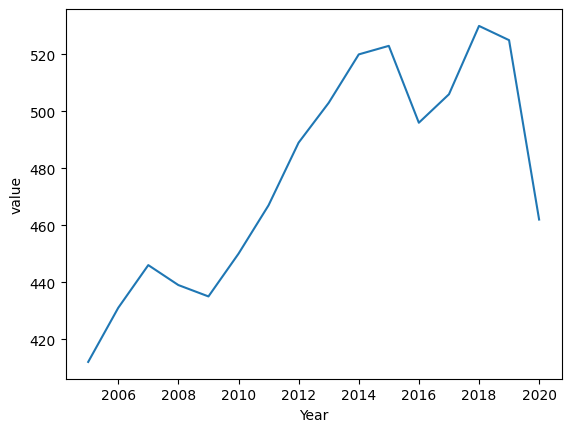

In [ ]:
## plot graph
plt.xlabel('Year')
plt.ylabel('value')
plt.plot(ind_df)

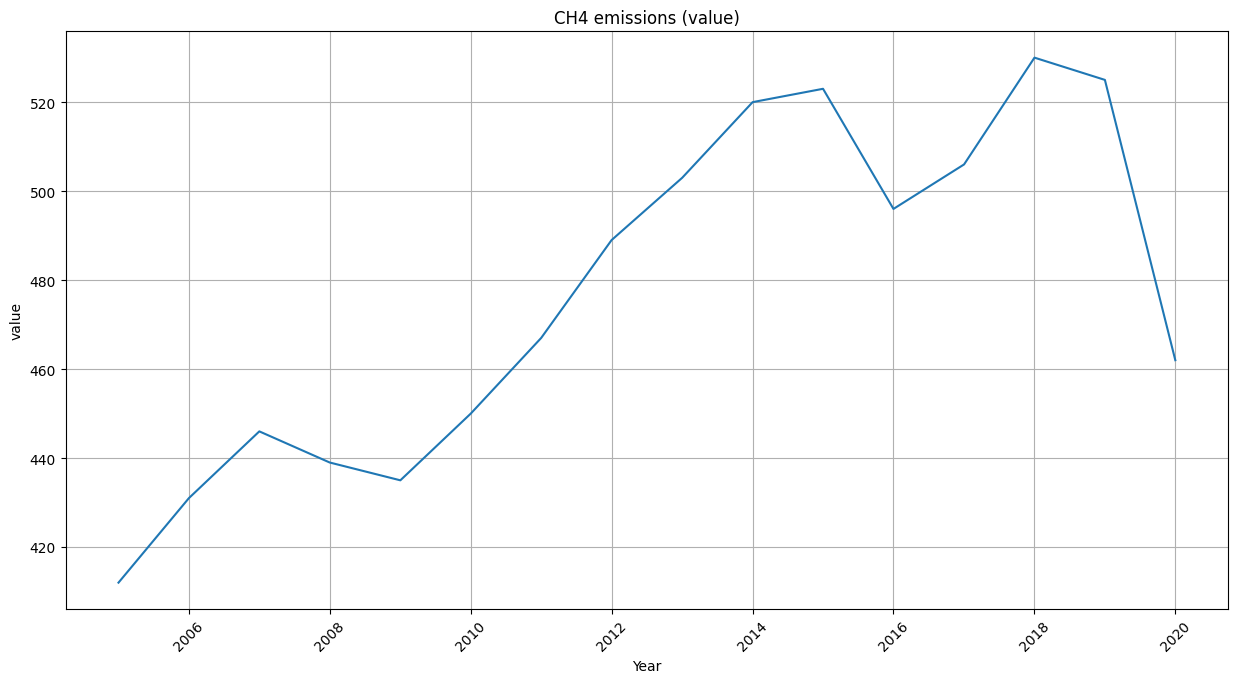

In [ ]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(df['Year'], df['value'])
plt.title('CH4 emissions (value)')
plt.ylabel('value')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Check for stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['value'])

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(e_value):
    result=adfuller(e_value)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used', 'Critial Values']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [ ]:
adfuller_test(ind_df['value'])

ADF Test Statistic : -3.538030635220562
p-value : 0.007062446804478489
#Lags Used : 6
Number of Observations Used : 9
Critial Values : {'1%': -4.473135048010974, '5%': -3.28988060356653, '10%': -2.7723823456790124}
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


For a Time series to be stationary, its ADCF test should have:

1. p-value should be low than 0.05 (H0 hypothesis).

2. Also,  The critical values at 1%,5%,10% confidence intervals should be pretty much close to the Test Statistics.

From the above ADCF test result, we see that p-value is very low. Also critical values are pretty much close to the Test Statistics. Hence, we can safely say that our Time Series is stationary.

In [ ]:
#Arima(p, d, q)
#d = 0 (since the data is stationary and no differencing)
Arima(p,0,q)


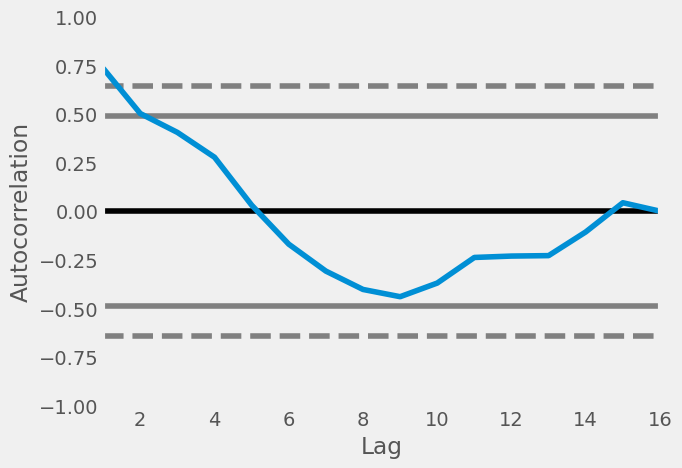

In [ ]:
#from pandas.tools.plotting import autocorrelation_plot

pd.plotting.autocorrelation_plot(ind_df['value'])
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

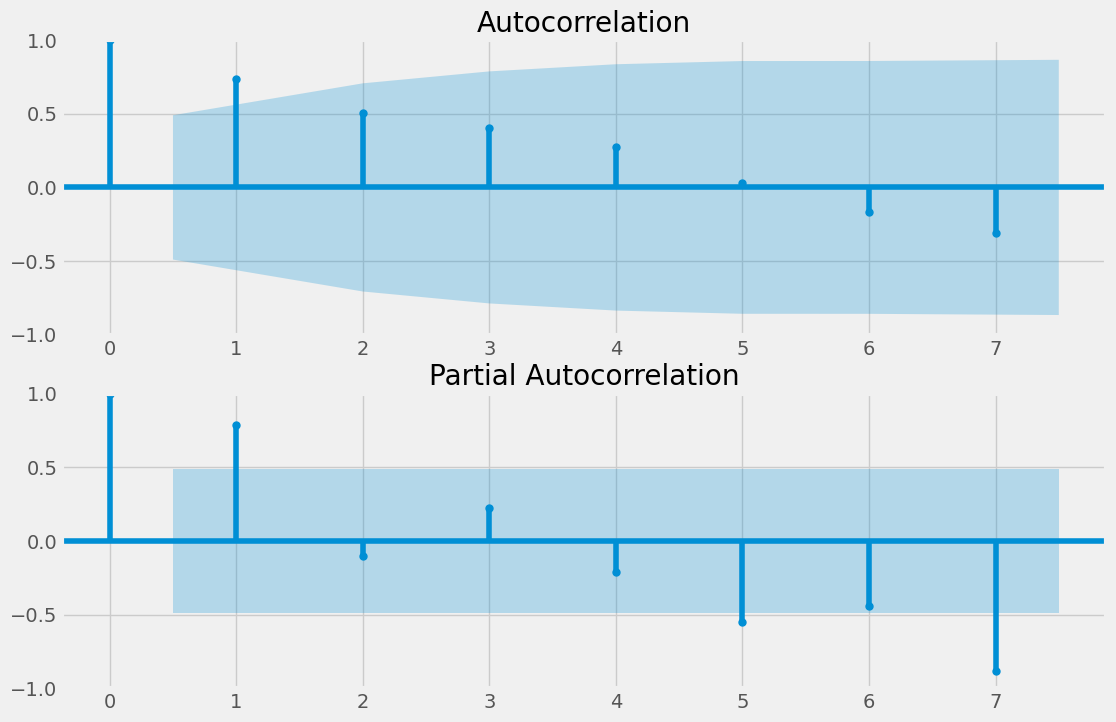

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ind_df['value'], lags=7,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ind_df['value'],lags=7,ax=ax2)

In [ ]:
Ar = 2
Ma = 5
d = 0

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
#mod_arima=sm.tsa.arima.ARIMA(ind_df['value'],order=(2,0,5))
mod_arima=sm.tsa.arima.ARIMA(ind_df['value'],order=(2,0,1))
mod_arima_fit=mod_arima.fit()

In [ ]:
#!pip install pmdarima
# import pmdarima as pm
# mod_arima = pm.auto_arima(ind_df['value'], stepwise=True, seasonal=True)
# mod_arima

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
print(mod_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   16
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 -69.735
Date:                Thu, 30 Mar 2023   AIC                            149.471
Time:                        15:42:15   BIC                            153.333
Sample:                    01-01-2005   HQIC                           149.668
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        461.7007     29.765     15.512      0.000     403.363     520.038
ar.L1          1.0250      0.576      1.780      0.075      -0.104       2.154
ar.L2         -0.3463      0.385     -0.900      0.3

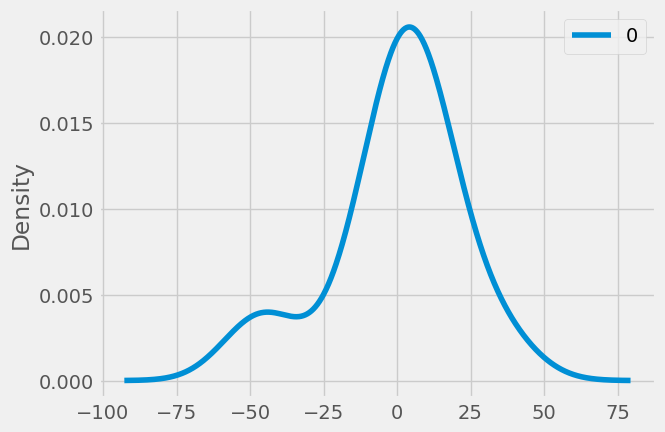

In [ ]:
residuals = pd.DataFrame(mod_arima_fit.resid)
residuals.plot(kind='kde')
plt.show()

Since the residuals appears to be normally distributed with zero mean, then the model seems to be a good fit for the data.

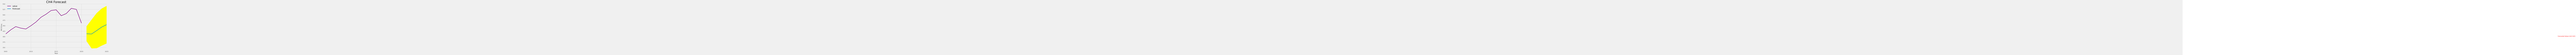

In [ ]:
#Forecasting 5 years ahead
forecast_values = mod_arima_fit.get_forecast(steps = 5)

#Confidence intervals of the forecasted values
forecast_ci = forecast_values.conf_int()

#Plot the data
ax = df.plot(x='Year', y='value', figsize = (16, 8), legend = True, color='purple')

#Plot the forecasted values
forecast_values.predicted_mean.plot(ax=ax, label='Forecast', figsize = (16, 8), grid=True)

#Plot the confidence intervals
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[: , 0],
                forecast_ci.iloc[: , 1], color='yellow', alpha = 1)
plt.title('CH4 Forecast', size = 30)
plt.ylabel('MtC02eq', size=16)
plt.legend(loc='upper left', prop={'size': 18})
ax.axes.get_xaxis().set_visible(True)
#annotation
ax.text(540, 400, 'Forecasted Values Until 2025', fontsize=12,  color='red')
plt.show()

In [ ]:
ind_df.tail()

,value
Year,
2016-01-01,496
2017-01-01,506
2018-01-01,530
2019-01-01,525
2020-01-01,462


In [ ]:
forecast_values.summary_frame()

value,mean,mean_se,mean_ci_lower,mean_ci_upper
2021-01-01,413.260895,17.306010,379.341739,447.180051
2022-01-01,411.944409,33.645310,346.000813,477.888004
2023-01-01,427.474562,41.086784,346.945944,508.003179
2024-01-01,443.849486,43.464872,358.659902,529.039070
2025-01-01,455.255909,43.928865,369.156915,541.354903


In [ ]:

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_log_error
#divide into train and validation set to calculate R-squared score and mean absolute percentage error
train = ind_df[:int(0.85*(len(ind_df)))]
test = ind_df[int(0.85*(len(ind_df))):]
start=len(train)
end=len(train)+len(test)-1
predictions = mod_arima_fit.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA Predictions')
evaluation_results = pd.DataFrame({'r2_score': r2_score(test['value'], predictions)}, index=[0])
evaluation_results['mean_absolute_error'] = mean_absolute_error(test['value'], predictions)
evaluation_results['mean_squared_error'] = mean_squared_error(test['value'], predictions)
evaluation_results['root_mean_squared_error'] = np.sqrt(mean_squared_error(test['value'], predictions))
evaluation_results['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - test['value'])
                                                               /np.abs(test['value']))*100
evaluation_results

,r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error,mean_absolute_percentage_error
0,0.346757,18.161136,625.51616,25.010321,3.814072


<font color='blue'> Forecast using Prophet model

In [ ]:
#!pip install prophet

from prophet import Prophet

from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
df_prophet = df.rename(columns={'Year':'ds',
                      'value':'y'})

In [ ]:
%%time
model = Prophet(yearly_seasonality=True,weekly_seasonality=False, daily_seasonality=False)
model.fit(df_prophet)

INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgoanv5na/z3tb55pv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgoanv5na/424wl4aw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7989', 'data', 'file=/tmp/tmpgoanv5na/z3tb55pv.json', 'init=/tmp/tmpgoanv5na/424wl4aw.json', 'output', 'file=/tmp/tmpgoanv5na/prophet_modelat2dc4d7/prophet_model-20230330143228.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:32:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:32:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


CPU times: user 68.2 ms, sys: 28.8 ms, total: 97 ms
Wall time: 250 ms


In [ ]:
#Predict to future
future = model.make_future_dataframe(periods=6, freq='y', include_history=False)
future.tail()

,ds
1,2021-12-31
2,2022-12-31
3,2023-12-31
4,2024-12-31
5,2025-12-31


In [ ]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1,2021-12-31,446.570654,427.684157,466.374923
2,2022-12-31,400.692182,379.903028,420.412683
3,2023-12-31,343.661195,322.422801,363.697669
4,2024-12-31,492.041449,471.119658,512.396715
5,2025-12-31,457.397238,436.567716,478.737131


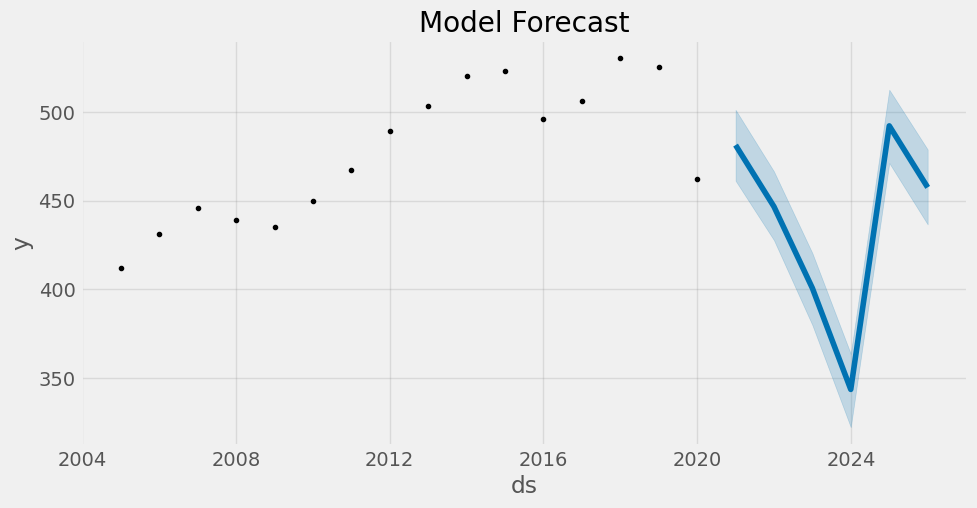

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = model.plot(forecast, ax=ax)
ax.set_title('Model Forecast')
plt.show()

Text(0.5, 1.0, 'Model Component Forecast')

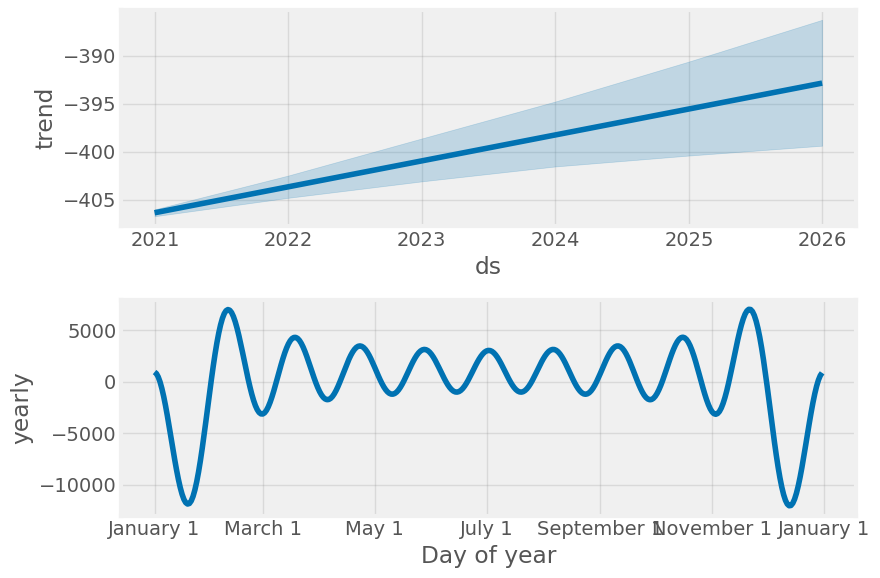

In [ ]:
fig_2 = model.plot_components(forecast)
ax.set_title('Model Component Forecast')

In [ ]:

from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [ ]:
#components
plot_components_plotly(model, forecast)

In [ ]:
pred_ch4 = forecast[['ds','yhat']]
pred_ch4.head(6)

,ds,yhat
0,2020-12-31,481.214864
1,2021-12-31,446.570654
2,2022-12-31,400.692182
3,2023-12-31,343.661195
4,2024-12-31,492.041449
5,2025-12-31,457.397238


Train, Test split to evaluate model performance

In [ ]:
split_date = '2015-01-01'
df_train = ind_df.loc[ind_df.index <= split_date].copy()
df_test = ind_df.loc[ind_df.index > split_date].copy()

In [ ]:
# # Format data for prophet model using ds and y
df_train_prophet = df_train.reset_index() \
    .rename(columns={'Year':'ds',
                     'value':'y'})

In [ ]:
%%time
mod_train = Prophet(yearly_seasonality=True,weekly_seasonality=False, daily_seasonality=False)
mod_train.fit(df_train_prophet)

INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgoanv5na/0j_ramfs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgoanv5na/_mrl8t7p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54676', 'data', 'file=/tmp/tmpgoanv5na/0j_ramfs.json', 'init=/tmp/tmpgoanv5na/_mrl8t7p.json', 'output', 'file=/tmp/tmpgoanv5na/prophet_model1ofiq0rq/prophet_model-20230330180508.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:05:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:05:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


CPU times: user 62.2 ms, sys: 28.3 ms, total: 90.5 ms
Wall time: 162 ms


In [ ]:
# Predict on test set with model
df_test_prophet = df_test.reset_index() \
    .rename(columns={'Year':'ds',
                     'value':'y'})

df_test_fcst = mod_train.predict(df_test_prophet)

In [ ]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(mod_train, df_test_fcst)

In [ ]:
#Python
plot_components_plotly(mod_train, df_test_fcst)

In [ ]:
np.sqrt(mean_squared_error(y_true=df_test['value'],
                   y_pred=df_test_fcst['yhat']))

77.4588313076948

In [ ]:
mean_absolute_error(y_true=df_test['value'],
                   y_pred=df_test_fcst['yhat'])

68.15887141585124

In [ ]:
mean_absolute_percentage_error(y_true=df_test['value'],
                   y_pred=df_test_fcst['yhat'])

13.869315820694023